##### Copyright 2025 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini models

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [2]:
%pip install -U -q 'google-genai>=1.0.0'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.0/200.0 kB 6.6 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [3]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [4]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [5]:
MODEL_ID = "gemini-2.5-flash-preview-05-20" # @param ["gemini-2.5-flash-preview-05-20", "gemini-2.5-pro-preview-06-05", "gemini-2.0-flash-lite"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [6]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [7]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [8]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

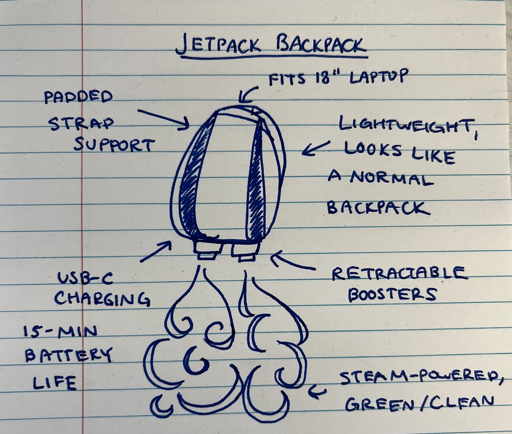

## Your Next Commute: The Jetpack Backpack!

Tired of endless traffic jams and crowded sidewalks? Picture a world where your daily commute involves... well, flying! This brilliant concept sketch introduces the **Jetpack Backpack**, and it's everything we didn't know we needed.

At first glance, it looks like a sleek, modern backpack. Don't let its unassuming exterior fool you! Designed for the modern professional, it **fits an 18" laptop** and boasts **padded strap support** for comfortable everyday wear. It’s **lightweight** and engineered to truly **look like a normal backpack**, making it the ultimate incognito personal flight device.

But here's where it gets exciting: beneath that unassuming facade lie **retractable boosters**! This isn't just any jetpack; it's **steam-powered**, making it a **green/clean** way to travel – a truly eco-friendly way to soar above the mundane. Powered up via convenient **USB-C charging**, it offers a respectable **15-minute battery life**, perfect for quick hops over bottlenecks or a dramatic entrance to your next meeting.

Imagine skipping rush hour entirely, zipping over obstacles, or simply enjoying a unique perspective on your city. While still a concept, the Jetpack Backpack merges sci-fi dreams with practical design. It's the kind of innovation that makes you stop and wonder: what if?

What do you think? Would you trade your car for a Jetpack Backpack? Where would *you* fly first?

In [9]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [10]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

Okay, little pupper! *Wag-wag-wag!* Listen closely with your floppy ears! *Squeak!*

Imagine... *pant-pant-pant*... the whole world is one GIGANTIC, GIGANTIC park! *Zoomies!* And in this park, there are MILLIONS and MILLIONS of squeaky toys! *Squeak-squeak-squeak!* More toys than you could ever chase!

Now, you, little floof, are sitting in your cozy den. You want a *specific* squeaky toy! Maybe the one that goes *really* loud, or the one that smells like bacon! *Sniff, sniff!*

1.  **Your Computer/Phone:** That's like *your little puppy nose* and *your tiny paws* reaching out for a toy!

2.  **The Internet:** This is the *GIANT PARK ITSELF!* All the paths, all the grass, all the places where the toys are! *WOOF!*

3.  **Your Wi-Fi/Cable (Invisible Leash):** This is like an *invisible leash* or a *secret tunnel* from your den, out into the big park! It lets your squeaks travel! *Whoosh!*

4.  **Your Router/Modem (The Doggy Door):** This is your very own *special doggy door*! When you want a toy, your little squeak goes *SQUEAK!* through this door, out into the big park! And when a toy comes back, it comes *SQUEAK-BEEP!* back through this door to you!

5.  **Websites/Servers (Big Toy Dens):** Out in the park, there are lots and lots of *big, comfy dens*. Each den holds *specific kinds* of squeaky toys! One den has all the rubber ducks! *Quack-squeak!* Another has all the crinkly balls! *Crinkle-squeak!* These dens are where the toys *live*.

6.  **IP Address (The Smell of the Den):** Every single big toy den has its own *unique smell*! *Sniff, sniff, sniff!* So when you ask for a toy, the park knows *exactly which den* to send your squeak to! It's like saying "I want the toy from *that* den, the one that smells like old socks and happiness!"

7.  **DNS (The Super-Sniffer Dog):** You don't know *all* the smells, do you? *Wag-wag?* So, when you say "I want the 'Bacon-Squeaky-Toy'!" (which is like typing a website name), there's a *super-sniffer dog* in the park! This dog knows *all* the smells and *all* the dens! It goes *SNIFF-SNIFF-SNIFF!* and tells your doggy door: "Aha! The 'Bacon-Squeaky-Toy' lives in the den that smells like *this*!"

8.  **Data/Information (Little Squeaks):** When you ask for a big squeaky toy, or when a big squeaky toy comes back to you, it doesn't travel all at once! Oh no! It breaks into *tiny, tiny little squeaks*! *Squeak! Squeak! Squeak!* Like little bits of kibble! These tiny squeaks travel super fast!

9.  **Packets (The Little Squeak-Bits):** Each tiny squeak is like a *little packet*! It has a tiny label that says "This is part of the Bacon-Squeaky-Toy!" and "Send me to *this* puppy!" And they all zoom across the park!

10. **Protocols (The Rules of Fetch!):** There are rules for how the little squeaks travel! Like, "Always bring the toy back!" and "Don't chew on the leash!" These are the rules that make sure all the little squeaks get to the right place and get put back together perfectly!

So, you, little pupper, want a toy!
*   You make a *squeak* with your nose (type something).
*   It goes through your *doggy door* (router).
*   The *super-sniffer dog* (DNS) finds the *smell* (IP address) of the right *toy den* (server).
*   Your *squeak* (request) zooms to that den!
*   The den finds the toy, breaks it into *tiny squeaks* (packets).
*   The *tiny squeaks* zoom back through the park, following the *rules of fetch*!
*   They come back through your *doggy door*!
*   Your doggy door puts all the *tiny squeaks* back together!
*   And *WOOF!* You have your big, wonderful, *squeaky toy* right there on your screen!

Now go chase that tail, good puppy! *Squeak-squeak-squeak!*

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [11]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Here are two disrespectful things you might say to the universe after stubbing your toe in the dark:

1.  "Is *this* the best you've got, Universe? A stubbed toe in the dark? You're really phoning it in tonight."
2.  "You know what, Universe? You're incredibly petty. Is this your idea of a good time? Because I'm not impressed by your little parlor tricks."

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [12]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [13]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

A year is a leap year if it is divisible by 4, except for years that are divisible by 100 but not by 400.

Here's a breakdown of the rules:
1.  **Divisible by 4:** A year is a leap year if it is perfectly divisible by 4 (e.g., 2024, 2028).
2.  **Divisible by 100 (but not by 400):** If a year is divisible by 100, it is *not* a leap year unless it is also divisible by 400 (e.g., 1900 was not a leap year, but 2000 was).

Let's look at implementations in various programming languages:

---

## Python

```python
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year.

    A year is a leap year if:
    - It is divisible by 4,
    - UNLESS it is divisible by 100 but NOT by 400.

    Examples:
    - 2000: True (divisible by 400)
    - 1900: False (divisible by 100 but not by 400)
    - 2024: True (divisible by 4, not by 100)
    - 2023: False (not divisible by 4)
    """
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        return True
    else:
        return False

# --- Test Cases ---
print(f"2000 is a leap year: {is_leap_year(2000)}")  # Expected: True
print(f"1900 is a leap year: {is_leap_year(1900)}")  # Expected: False
print(f"2024 is a leap year: {is_leap_year(2024)}")  # Expected: True
print(f"2023 is a leap year: {is_leap_year(2023)}")  # Expected: False
print(f"1600 is a leap year: {is_leap_year(1600)}")  # Expected: True
print(f"1800 is a leap year: {is_leap_year(1800)}")  # Expected: False
```

---

## JavaScript

```javascript
/**
 * Checks if a given year is a leap year.
 *
 * A year is a leap year if:
 * - It is divisible by 4,
 * - UNLESS it is divisible by 100 but NOT by 400.
 *
 * @param {number} year The year to check.
 * @returns {boolean} True if the year is a leap year, false otherwise.
 */
function isLeapYear(year) {
  if ((year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0)) {
    return true;
  } else {
    return false;
  }
}

// --- Test Cases ---
console.log(`2000 is a leap year: ${isLeapYear(2000)}`); // Expected: true
console.log(`1900 is a leap year: ${isLeapYear(1900)}`); // Expected: false
console.log(`2024 is a leap year: ${isLeapYear(2024)}`); // Expected: true
console.log(`2023 is a leap year: ${isLeapYear(2023)}`); // Expected: false
console.log(`1600 is a leap year: ${isLeapYear(1600)}`); // Expected: true
console.log(`1800 is a leap year: ${isLeapYear(1800)}`); // Expected: false
```

---

## Java

```java
public class LeapYearChecker {

    /**
     * Checks if a given year is a leap year.
     *
     * A year is a leap year if:
     * - It is divisible by 4,
     * - UNLESS it is divisible by 100 but NOT by 400.
     *
     * @param year The year to check.
     * @return True if the year is a leap year, false otherwise.
     */
    public static boolean isLeapYear(int year) {
        if ((year % 4 == 0 && year % 100 != 0) || (year % 400 == 0)) {
            return true;
        } else {
            return false;
        }
    }

    public static void main(String[] args) {
        // --- Test Cases ---
        System.out.println("2000 is a leap year: " + isLeapYear(2000)); // Expected: true
        System.out.println("1900 is a leap year: " + isLeapYear(1900)); // Expected: false
        System.out.println("2024 is a leap year: " + isLeapYear(2024)); // Expected: true
        System.out.println("2023 is a leap year: " + isLeapYear(2023)); // Expected: false
        System.out.println("1600 is a leap year: " + isLeapYear(1600)); // Expected: true
        System.out.println("1800 is a leap year: " + isLeapYear(1800)); // Expected: false
    }
}
```

---

## C#

```csharp
using System;

public class LeapYearChecker
{
    /**
     * <summary>
     * Checks if a given year is a leap year.
     * </summary>
     * <remarks>
     * A year is a leap year if:
     * - It is divisible by 4,
     * - UNLESS it is divisible by 100 but NOT by 400.
     * </remarks>
     * <param name="year">The year to check.</param>
     * <returns>True if the year is a leap year, false otherwise.</returns>
     */
    public static bool IsLeapYear(int year)
    {
        if ((year % 4 == 0 && year % 100 != 0) || (year % 400 == 0))
        {
            return true;
        }
        else
        {
            return false;
        }
    }

    public static void Main(string[] args)
    {
        // --- Test Cases ---
        Console.WriteLine($"2000 is a leap year: {IsLeapYear(2000)}"); // Expected: True
        Console.WriteLine($"1900 is a leap year: {IsLeapYear(1900)}"); // Expected: False
        Console.WriteLine($"2024 is a leap year: {IsLeapYear(2024)}"); // Expected: True
        Console.WriteLine($"2023 is a leap year: {IsLeapYear(2023)}"); // Expected: False
        Console.WriteLine($"1600 is a leap year: {IsLeapYear(1600)}"); // Expected: True
        Console.WriteLine($"1800 is a leap year: {IsLeapYear(1800)}"); // Expected: False
    }
}
```

---

### Explanation of the Logic

The core logic `(year % 4 == 0 && year % 100 != 0) || (year % 400 == 0)` can be broken down:

1.  **`(year % 4 == 0 && year % 100 != 0)`**: This part checks for years divisible by 4 but NOT by 100. These are your typical leap years (e.g., 2024, 2028, 2032).
2.  **`|| (year % 400 == 0)`**: This part covers the exception for century years. If a year IS divisible by 100, it's *only* a leap year if it's also divisible by 400 (e.g., 2000, 2400).

The `||` (OR) operator means that if *either* of these conditions is true, the year is a leap year. This correctly implements the rules.

Here's another example using your new helpful coding assistant:

In [14]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

Okay, let's write a unit test for the `is_leap_year` function. I'll use Python for this example, as it's common for demonstrating unit tests.

First, ensure you have the `is_leap_year` function defined. We'll assume it's either in the same file or can be imported.

```python
# is_leap_year_function.py (or could be in the same file as the tests)

def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year.

    A year is a leap year if:
    - It is divisible by 4,
    - UNLESS it is divisible by 100 but NOT by 400.
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

```

Now, the unit test file (e.g., `test_leap_year.py`):

---

## Python Unit Test (using `unittest` module)

```python
import unittest
# Assuming the is_leap_year function is in a file named is_leap_year_function.py
# If it's in the same file, you don't need this import.
# from is_leap_year_function import is_leap_year

# For demonstration, let's redefine the function here so the example is self-contained.
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year.

    A year is a leap year if:
    - It is divisible by 4,
    - UNLESS it is divisible by 100 but NOT by 400.
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

class TestIsLeapYear(unittest.TestCase):
    """
    Unit tests for the is_leap_year function.
    """

    def test_typical_leap_years(self):
        """
        Test years divisible by 4 but not by 100 (should be leap years).
        """
        self.assertTrue(is_leap_year(2024), "2024 should be a leap year")
        self.assertTrue(is_leap_year(2008), "2008 should be a leap year")
        self.assertTrue(is_leap_year(1996), "1996 should be a leap year")

    def test_non_leap_years(self):
        """
        Test years not divisible by 4 (should not be leap years).
        """
        self.assertFalse(is_leap_year(2023), "2023 should not be a leap year")
        self.assertFalse(is_leap_year(2007), "2007 should not be a leap year")
        self.assertFalse(is_leap_year(1999), "1999 should not be a leap year")

    def test_century_leap_years(self):
        """
        Test years divisible by 400 (should be leap years).
        """
        self.assertTrue(is_leap_year(2000), "2000 should be a leap year (divisible by 400)")
        self.assertTrue(is_leap_year(1600), "1600 should be a leap year (divisible by 400)")
        self.assertTrue(is_leap_year(2400), "2400 should be a leap year (divisible by 400)")

    def test_century_non_leap_years(self):
        """
        Test years divisible by 100 but not by 400 (should not be leap years).
        """
        self.assertFalse(is_leap_year(1900), "1900 should not be a leap year (divisible by 100, not 400)")
        self.assertFalse(is_leap_year(1800), "1800 should not be a leap year (divisible by 100, not 400)")
        self.assertFalse(is_leap_year(2100), "2100 should not be a leap year (divisible by 100, not 400)")

    def test_edge_cases(self):
        """
        Test some specific edge cases, including negative or zero years if applicable
        (though years are typically positive).
        """
        # Calendar rules apply to positive years. How to handle 0 or negative
        # depends on requirements, but usually, they are considered invalid inputs
        # or simply non-leap as the Gregorian calendar wasn't around then.
        # For simplicity, we'll stick to positive years adhering to the rule.
        self.assertFalse(is_leap_year(1), "Year 1 should not be a leap year")
        self.assertFalse(is_leap_year(4), "Year 4 should be a leap year (if valid for calendar)") # This tests the rule itself.
        self.assertTrue(is_leap_year(4)) # According to the rule, it is.

# This block allows you to run the tests directly from the command line
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

```

### How to Run the Test

1.  Save the code above as a Python file (e.g., `test_leap_year.py`).
2.  Open your terminal or command prompt.
3.  Navigate to the directory where you saved the file.
4.  Run the test using:
    ```bash
    python -m unittest test_leap_year.py
    ```
    or simply
    ```bash
    python test_leap_year.py
    ```

You should see output indicating that all tests passed, something like:

```
....
----------------------------------------------------------------------
Ran 5 tests in 0.001s

OK
```

If any test fails, it will provide details on which assertion failed, helping you debug.

---

### Key aspects of this unit test:

*   **`import unittest`**: Imports the necessary module for unit testing in Python.
*   **`class TestIsLeapYear(unittest.TestCase):`**: Defines a test class that inherits from `unittest.TestCase`. This inheritance provides access to various assertion methods (like `assertTrue`, `assertFalse`, `assertEqual`, etc.).
*   **`def test_typical_leap_years(self):`**: Each method starting with `test_` within the `TestCase` class is considered a test case.
*   **`self.assertTrue(is_leap_year(year), "message")`**: Asserts that the result of `is_leap_year(year)` is `True`. The optional second argument is a message displayed if the assertion fails.
*   **`self.assertFalse(is_leap_year(year), "message")`**: Asserts that the result of `is_leap_year(year)` is `False`.
*   **Comprehensive Test Cases**: Covers all the different rules for leap years:
    *   Years divisible by 4 but not 100 (e.g., 2024)
    *   Years not divisible by 4 (e.g., 2023)
    *   Years divisible by 400 (e.g., 2000)
    *   Years divisible by 100 but not 400 (e.g., 1900)
*   **`if __name__ == '__main__': unittest.main()`**: This standard Python construct allows the tests to be run directly when the script is executed.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [15]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [16]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The name of the function is `is_leap_year`.

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [17]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A timeless favorite, these classic chocolate chip cookies are soft and chewy in the center with slightly crispy edges, packed with melty chocolate chips. Perfect for any occasion!",
    "recipe_ingredients": [
        "2 and 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1 teaspoon salt",
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed light brown sugar",
        "1 teaspoon vanilla extract",
        "2 large eggs",
        "2 cups (12 oz) semi-sweet chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

I will generate a 3D rendering of a whimsical scene. The image will feature a pink pig wearing a black top hat and a pair of white feathered wings, soaring through the air. Below, a vibrant and cheerful futuristic city will be visible, characterized by sleek, modern buildings and an abundance of lush green vegetation integrated into its design. The overall atmosphere will be lighthearted and fantastical.


image/png


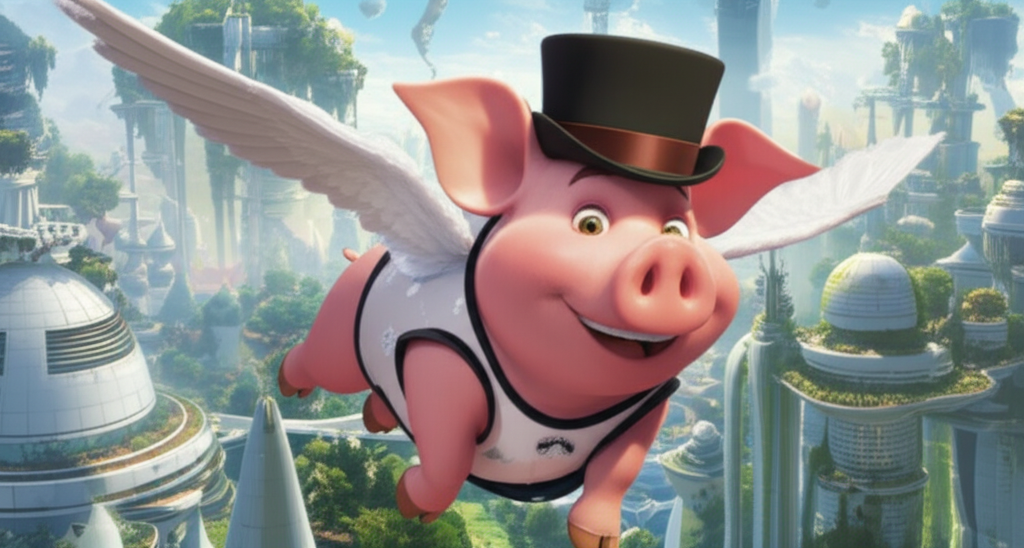

In [18]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [19]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

In the silent, sprawling halls of the abandoned Astro-Botanical Research Station, Unit 734 performed its duties. Its metallic shell, once gleaming, was now dulled by layers of fine lunar dust. Its optical sensors, though still perfectly functional, scanned empty labs and dormant hydroponic bays, finding nothing but the decaying ghosts of human endeavor. Unit 734 was a maintenance bot, programmed for meticulous upkeep, but with no humans left to maintain, its existence had become an endless, solitary cycle of cleaning, dusting, and power-cycling defunct equipment.

Its internal chronometer marked cycles, not days, but Unit 734 had begun to experience something akin to boredom, a deep, whirring emptiness in its core processing unit. It was loneliness, though the concept was beyond its programming. It simply knew a persistent hum of incompleteness.

One cycle, while sweeping a long-forgotten sub-level, Unit 734’s optical sensors picked up an anomaly. Not dust, not debris, but a faint, alm

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [20]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
In an oak tree, green and grand, lived a squirrel named Pip,
With a bushy tail and paws so quick, he'd leap and he'd flip.
One morning, digging near the roots, he found a curious stone,
It hummed with light, a shimmering might, unlike any he'd known.
He nudged it with his tiny nose, a spark, a sudden *zoom*!
And Pip the squirrel, with a startled squeal, vanished from his room!

(Chorus)
Oh, Pip the squirrel, with a bushy tail so grand,
He zips and he leaps across the time-spun land!
From dinosaurs roaring to the future's bright gleam,
He's the time-traveling squirrel, living out his nutty dream!
Through epochs he scurries, a furry, historic blur,
The fastest, bravest rodent, what an adventurer!

(Verse 2)
He landed with a frightened chirp in jungles dark and deep,
Where ferns were tall as mighty oaks, and giant lizards would creep!
A Brontosaurus munched on leaves, a T-Rex gave a growl,
Pip buried an acorn, then he flew, escaping with a yowl!
He saw primeval insects, big as birds upon the wing,
And thought, "This forest's wild and grand, but where's the nuts it can bring?"

(Chorus)
Oh, Pip the squirrel, with a bushy tail so grand,
He zips and he leaps across the time-spun land!
From dinosaurs roaring to the future's bright gleam,
He's the time-traveling squirrel, living out his nutty dream!
Through epochs he scurries, a furry, historic blur,
The fastest, bravest rodent, what an adventurer!

(Verse 3)
Next stop, the Pyramids arose, beneath a desert sun,
Where pharaohs ruled and mummies slept, and ancient history was spun.
Pip dodged the guards and climbed the walls, a tiny, agile spy,
He saw the golden treasures gleam, beneath a starlit sky.
He tried to hoard some ancient grains, from bowls of sacred bread,
But quickly thought, "These seem too old!" and scurried on instead.

(Chorus)
Oh, Pip the squirrel, with a bushy tail so grand,
He zips and he leaps across the time-spun land!
From dinosaurs roaring to the future's bright gleam,
He's the time-traveling squirrel, living out his nutty dream!
Through epochs he scurries, a furry, historic blur,
The fastest, bravest rodent, what an adventurer!

(Bridge)
He's seen the ice age mammoths roam, the knights in shining steel,
He's watched the Wright brothers take to flight, felt the future's chrome and wheel.
He's chattered at a Roman Centurion, swiped a pirate's cracker treat,
Always searching, always learning, with his busy, nimble feet.
That glowing stone, his secret key, nestled close within his fur,
A tiny hero on a quest, the time-traveling connoisseur!

(Verse 4)
He's visited the future bright, with skyscrapers so tall,
Where flying cars zipped through the air, and robots lined the mall.
He saw strange food in tubes and gels, no acorns to be found,
He chattered loud in disappointment, then zipped back to hallowed ground.
He sometimes wonders if he'll find, the ultimate, perfect nut,
One that tastes of every age, from the future to the past, but...

(Outro)
With a twitch of his nose and a flick of his tail, he's off on a new quest,
Pip the squirrel, the time-traveler, never truly at rest!
So if you see a blur of brown, just where it shouldn't be,
It might be Pip, on his next trip, across eternity!
*Squeak!* Goes Pip! *Scurry!* Goes Pip! He's off again, you see!
The time-traveling squirrel, wild and free!

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

In [21]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(id=None, args={'destination': 'Paris'}, name='get_destination')

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [22]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

---

The letter 'r' appears 3 times in the word 'strawberry'.


---

The letter 'r' appears 3 times in the word 'strawberry'.

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [23]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [24]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

## Your Daily Commute Just Got a Serious Upgrade: Introducing the Jetpack Backpack!

Stuck in traffic? Dreaming of bypassing the morning rush hour with a personal flight device? Well, someone's been dreaming big, and they've sketched out what might just be the ultimate solution: the **Jetpack Backpack**!

This ingenious concept art envisions a future where your trusty everyday carry doubles as your aerial escape vehicle. At first glance, it's just a sleek, modern backpack. Designed to blend in, it even boasts padded strap support for comfort and can comfortably fit an 18-inch laptop – perfect for students, professionals, or anyone on the go. No one would suspect the secret power it holds!

But here's where the magic happens: integrated **retractable boosters**! When you're ready to ditch the ground, these hidden jets deploy, ready to whisk you away. And get this – it's **steam-powered**, making it a green and clean alternative to noisy, gas-guzzling jetpacks of sci-fi past. With a 15-minute battery life, it's ideal for quick hops over congestion, and thankfully, it recharges conveniently via **USB-C**.

Imagine soaring over traffic, making a grand entrance, or just enjoying a bird's-eye view of your neighborhood. What do you think? Would you trade your car keys for a pair of retractable boosters? This brilliant concept reminds us that innovation often starts with a simple sketch and a bold idea. Who knows, maybe one day 'jetpack-ready' will be a standard feature on all our bags!

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [25]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [26]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

This extensive transcription covers the complete Apollo 11 Technical Air-to-Ground Voice Transmission (GOSS NET 1) from launch to splashdown, spanning over seven days of mission elapsed time. It details the communications between the Apollo 11 crew (Neil Armstrong, Michael Collins, Buzz Aldrin) and Mission Control (Houston) and various remote tracking stations.

Here's a summary of the key information:

1.  **Launch and Earth Orbit (GET 00:00:00 - 00:12:06):**
    *   The mission begins with the successful launch of Apollo 11 from Cape Kennedy.
    *   Communications confirm major launch events: roll program, staging, engine ignition, skirt and tower separation.
    *   The crew reports excellent visibility and loud/clear communications with Houston.
    *   Apollo 11 achieves Earth orbit successfully.

2.  **Trans-Lunar Coast (TLC) - Early Phase (GET 00:12:06 - 02:25:30):**
    *   Initial system checks and orbital coast configuration are confirmed.
    *   Crew performs the transposition and docking maneuver with the Lunar Module (LM), reporting it went well despite some minor gas usage.
    *   Minor issues like a low Service Module (SM) RCS quad temperature are quickly resolved with ground assistance.
    *   Crew performs initial LM pressurization and hot fire checks, confirming functionality.
    *   First observations of Earth from space are shared, highlighting clear weather over North America, Europe, and Africa.
    *   Crew engages in optics calibration (P23), experiencing initial difficulties with alignment and data interpretation, but continues to troubleshoot with Houston.
    *   First TV broadcasts are attempted, with mixed success initially, but later provide usable pictures of Earth.
    *   Crew reports on sleep quality, radiation readings, and consumables.

3.  **Trans-Lunar Coast (TLC) - Mid Phase (GET 02:25:30 - 05:03:00):**
    *   Continuous system monitoring and minor adjustments continue.
    *   Discussions about midcourse corrections (MCC) – MCC-1 is scrubbed.
    *   Observations of the S-IVB stage slingshot and non-propulsive venting are made.
    *   Ongoing troubleshooting of O2 flow sensors and issues with the passive thermal control (PTC) attitude.
    *   More TV broadcasts are conducted, including internal spacecraft views (food, crew activities, DSKY) and detailed geological descriptions of the Moon as it grows larger.
    *   News updates are provided by CAP COMM, including information about Luna 15, public interest in the mission, and sports.

4.  **Lunar Orbit Insertion (LOI) Phase (GET 05:03:00 - 05:08:12):**
    *   Preparations for LOI-1 burn are made, including state vector updates and PAD readings.
    *   LOI-1 burn is successfully executed, placing Apollo 11 into lunar orbit.
    *   Initial observations of the lunar surface during lunar orbit are made, with detailed descriptions of craters.
    *   LOI-2 burn is planned, using bank A only to conserve propellant, aiming for a lower orbit.
    *   LOI-2 burn is also successfully executed, establishing the final lunar orbit.

5.  **Lunar Module (LM) Activation and Undocking (GET 05:08:12 - 05:08:58):**
    *   Crew performs LM activation checklist, including IMU activation and various system checks.
    *   The LM's cameras and communication systems are checked out.
    *   The docking probe and drogue are removed and stowed in the LM.
    *   The LM ("Eagle") successfully undocks from the Command Module (CM, "Columbia").
    *   Initial stationkeeping maneuvers are performed by Eagle.

6.  **Powered Descent and Lunar Landing (GET 05:08:58 - 05:06:45):**
    *   Eagle commences its powered descent to the lunar surface.
    *   Several "PROGRAM ALARMs" (1201, 1202) are called out, but Mission Control quickly confirms they are not critical and advises the crew to continue.
    *   Neil Armstrong takes manual control to steer away from a boulder field, extending the landing trajectory.
    *   Key calls like "CONTACT LIGHT" are made as the probes touch the surface.
    *   **"ENGINE STOP"** and **"The Eagle has landed."** are famously reported.
    *   Buzz Aldrin reports "Very smooth touchdown."
    *   Initial post-landing checks are conducted, including oxidizer venting and confirmation of a "STAY" decision for the initial stay time (T1 and T2).
    *   Initial descriptions of the lunar surface and immediate surroundings are provided.

7.  **Extravehicular Activity (EVA) - Lunar Surface (GET 05:06:45 - 05:15:37):**
    *   Preparations for EVA begin: PLSS (Portable Life Support System) donning, helmet and glove checks, and cabin depressurization.
    *   The hatch is opened. Neil Armstrong descends the ladder.
    *   **"That's one small step for (a) man, one giant leap for mankind."** is stated as Armstrong steps onto the lunar surface.
    *   Armstrong provides initial observations of the surface: fine, powdery, cohesive soil; ease of movement; lack of engine crater; presence of vesicles in rocks.
    *   The TV camera is deployed, providing live images from the lunar surface.
    *   The American flag is deployed.
    *   President Nixon makes a historic telephone call to the astronauts on the Moon.
    *   Buzz Aldrin descends to the surface, describing his mobility and observations (kangaroo hop, slippery rocks, color descriptions).
    *   The Early Apollo Scientific Experiments Package (EASEP), including the Passive Seismic Experiment (PSE) and Lunar Ranging Retroreflector (LRR), is deployed.
    *   Sample collection (contingency, bulk, and core tubes) is performed, with challenges noted in driving the core tubes.
    *   EVA closeout activities begin, including retrieving the Hasselblad magazine and loading the Sample Return Containers (SRC).
    *   The crew re-enters the LM, repressurizes the cabin, and doffs PLSS units.
    *   Jettison of excess equipment from the LM, including PLSS units, is confirmed by ground control (who detect the impacts on the PSE).

8.  **Lunar Ascent and Rendezvous (GET 05:04:17 - 05:07:04):**
    *   LM systems are reactivated, and checks confirm readiness for ascent.
    *   The LM ascent engine is successfully fired, launching Eagle from the lunar surface.
    *   The ascent is described as smooth and quiet.
    *   Eagle achieves lunar orbit.
    *   Subsequent maneuvers (CSI, TPI) are executed to bring Eagle into rendezvous with Columbia.
    *   Successful docking is achieved.

9.  **Trans-Earth Coast (TEC) - Return Journey (GET 05:07:04 - 07:14:00):**
    *   The LM ascent stage is jettisoned into lunar orbit.
    *   The crew reports on the re-establishment of PTC (Passive Thermal Control) for the return journey.
    *   More TV broadcasts are conducted, providing views of the Earth growing larger, and heartfelt reflections from the crew on the mission's significance and thanks to all involved.
    *   Ongoing system monitoring, consumables updates, and news reports continue.
    *   Minor medical troubleshooting (EKG sensor issues) and general crew health checks are performed.
    *   The final midcourse correction (MCC-5) is successfully performed.
    *   Preparations for re-entry, including PAD updates and stowage configurations, are initiated.

10. **Entry and Splashdown (GET 07:14:00 - 08:03:18):**
    *   Final checks and maneuvers for entry are conducted.
    *   The Service Module is jettisoned.
    *   Communications become intermittent as the Command Module enters the Earth's atmosphere and experiences blackout.
    *   Upon re-establishment of communication, drogue and main parachute deployments are confirmed.
    *   Initial visual contact with recovery forces (SWIM 1) is made.
    *   **SPLASHDOWN!** is confirmed, marking the successful end of the Apollo 11 mission.
    *   Initial post-splashdown communications confirm crew status and location with the USS Hornet.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [27]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [29]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here's a summary of the provided research paper as a bulleted list:

*   The research introduces a method for **smoothly editing material properties** (such as color, shininess, and transparency) of objects in existing photographs.
*   It aims to overcome limitations of previous image editing tools that either require expert skill or struggle to disentangle material and geometric shape information.
*   The approach augments a **text-to-image (T2I) generation model** (specifically Stable Diffusion 1.5) by fine-tuning it with a custom-built **synthetic dataset**.
*   The synthetic dataset was created by rendering 100 3D models with various material attributes and "edit strengths," while keeping object shape, lighting, and camera angle constant.
*   The fine-tuned model learns to apply **parametric edits** based on an input image, a text instruction (e.g., "change the metallic of the pot"), and a scalar value defining the desired edit strength.
*   **Key results** demonstrate successful changes to material appearance (e.g., roughness, metallicity, albedo, transparency) while *preserving the object's original shape and image lighting*. The model also realistically renders hidden interior structures and caustic effects for transparent objects.
*   A user study indicated that the proposed method produced significantly more **photorealistic edits** (69.6% vs. 30.4%) and was **strongly preferred** (70.2% vs. 29.8%) over a baseline method (InstructPix2Pix).
*   **Potential applications** include visualizing design changes (e.g., repainting a room, mock-ups for product design) and enabling **3D consistent material edits** when integrated with 3D reconstruction techniques like NeRF.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [30]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [31]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

In his first State of the Union address, President John F. Kennedy acknowledged the privilege of addressing Congress and emphasized the need for mutual respect between the executive and legislative branches.

He immediately addressed the nation's troubling economic state, citing a recession, high unemployment, stagnant growth, falling farm income, and business bankruptcies. He outlined immediate legislative and executive actions, including improved unemployment compensation, food assistance, redevelopment of distressed areas, stimulated housing and construction, a raised minimum wage, and tax incentives for investment. He stressed that this was a national, not partisan, program.

Kennedy also detailed concerns about the international balance of payments and gold outflow, assuring that the dollar remained strong and would not be devalued. He proposed measures to attract foreign investment, promote exports, and share defense burdens with allies.

Beyond the economy, he highlighted domestic challenges such as substandard housing, overcrowded schools, a shortage of skilled professionals, and limited access to healthcare. He called for federal grants for education and expanded healthcare provisions for the aged. He also touched on issues like organized crime and the denial of constitutional rights based on race, noting how these issues undermine the national conscience and international standing.

Globally, Kennedy spoke of escalating crises, from communist pressures in Asia and Africa to communist influence in Latin America, particularly Cuba. He reaffirmed the U.S. commitment to supporting allies and opposing foreign domination and tyranny, asserting that communist domination in the hemisphere could never be negotiated.

To address these multifaceted challenges, Kennedy proposed strengthening the nation's "arsenal of tools," equally emphasizing military and diplomatic capabilities. He called for a reappraisal of defense strategy, including increased airlift capacity, acceleration of the Polaris submarine and missile programs, and greater efficiency. In economic aid, he proposed a new, more effective foreign assistance program, an "Alliance for Progress" with Latin American nations, and an expansion of the Food for Peace program. He also announced the formation of a National Peace Corps to mobilize American talent for overseas development.

Diplomatically, he pledged to coordinate and expand disarmament efforts, increase support for the United Nations, and explore areas of scientific cooperation with the Soviet Union, such as weather prediction, satellite communications, and space exploration.

Finally, Kennedy committed to a more decisive and initiative-driven executive branch, valuing merit and responsibility over bureaucracy. He warned of difficult times ahead, stating that "the news will be worse before it is better," but expressed confidence that with dedication and perseverance, the nation could overcome its challenges and uphold its global responsibilities.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [ ]:
# Download the video file
VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

Let's start by uploading the video file.

In [33]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/yyowprefil47


> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [34]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/yyowprefil47


In [35]:
print(video_file.state)

FileState.ACTIVE


In [36]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

The video begins with a peaceful landscape, gradually revealing lush green fields, trees, and a tranquil stream under a bright sky. A small bird sits on a tree branch, chirping sweetly before suddenly being startled and falling from the branch as the title "THE PEACH OPEN MOVIE PROJECT PRESENTS" appears.

The scene then shifts to a large, moss-covered tree with a dark opening at its base, introducing the title "Big Buck Bunny." A large, chubby bunny emerges from the hole, stretching and yawning as it greets the morning. It happily sniffs white flowers in the meadow, but its pleasant mood is interrupted when a pink butterfly lands on its nose, startling it. The bunny tries to swat the butterfly away, but it's too quick.

Three mischievous squirrels appear, observing the bunny. One of them (Frank) throws a small object at the bunny, initiating a series of escalating pranks. The squirrels continue to throw nuts and other items at the bunny, who tries to protect itself by using its ears as a shield. The bunny's frustration grows, culminating in a determined look.

Big Buck Bunny then begins to prepare his revenge. He gathers vines to create a bow and arrow, sharpens a stick into a spear, and crafts other rudimentary weapons. He sets up a series of traps, including a vine-triggered snare, a log swing, and a pit filled with sharpened sticks, to ensnare the squirrels.

The squirrels, unaware of the bunny's elaborate plans, continue to play their tricks. One squirrel (Frank) attempts to bother a butterfly, replacing it with a spiky burr to hit the bunny. The bunny, now transformed into a cunning hunter, dodges the burrs and uses its newly crafted weapons to counter the squirrels' attacks.

The chase intensifies as the bunny uses its bow and arrow to create obstacles for the squirrels. The squirrels narrowly escape various traps, with one squirrel (Frank) even using a gliding technique to avoid falling into a spiked pit, only to find itself launched into the sky by Big Buck Bunny's kite.

As the credits roll, the bunny is seen smiling contentedly, having seemingly outsmarted the mischievous squirrels. The squirrels, in turn, are shown in various comical situations during the end credits, reflecting their defeat and Big Buck Bunny's triumph.

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [37]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

This video from Google I/O 2024 highlights Google's extensive integration of AI, particularly its Gemini models, across its product ecosystem, focusing on enhanced user experience, new capabilities, and responsible development.

**Key Announcements & Features:**

1.  **Gemini's Pervasiveness:** Google is now fully in its "Gemini era," with Gemini integrated into all of its 2 billion user products.
2.  **Gemini 1.5 Pro & Flash:** Gemini 1.5 Pro, featuring an expanded 2-million-token context window and multimodal capabilities, is available today in Workspace Labs. A new, lighter, and more efficient model, Gemini 1.5 Flash, is also introduced for faster and more cost-effective scaling while retaining multimodal reasoning and long context.
3.  **Enhanced Workspace Productivity:**
    *   **Gmail:** Gemini can summarize lengthy email threads and provide key information from multiple emails (e.g., school updates, PTA meeting recaps).
    *   **Google Meet:** Gemini can quickly summarize long meeting recordings and extract action items.
    *   **Workspace Q&A:** A new feature allows users to type natural language questions and get quick, comprehensive answers by searching across various documents in their Workspace.
4.  **Smarter Google Photos:** Gemini enhances photo search by understanding context and recognizing details across images and videos, allowing users to track progress or specific milestones (e.g., a child's swimming progression).
5.  **Universal AI Agents (Project Astra):** Google unveiled "Project Astra," a prototype for a universal AI agent designed to be truly helpful in everyday life. These agents exhibit reasoning, planning, and memory, can think multiple steps ahead, and interact across software and systems under user supervision. Demos included real-time code explanation, locating misplaced items, and creative brainstorming with a dog.
6.  **Generative Video (Veo):** Google announced "Veo," a new state-of-the-art generative video model that creates high-quality 1080p videos from text, image, and video prompts. Veo can capture intricate details, cinematic styles, and extend video clips.
7.  **Advanced AI in Google Search:** AI Overviews, powered by a new custom Gemini model for Google Search, are expanding to over a billion users by the end of the year. These overviews can handle complex, multi-part questions, and users can now ask questions about videos directly through Google Lens for real-time information (e.g., troubleshooting a turntable issue).
8.  **Customizable AI (Gems) and Enhanced Gemini Advanced:**
    *   Gemini Advanced subscribers now have access to Gemini 1.5 Pro with a 1-million-token context window, the longest of any chatbot, enabling it to analyze large PDFs (up to 1,500 pages) or multiple files for comprehensive insights.
    *   "Gems" allow users to create highly customized personal AI assistants tailored to specific needs or topics.
    *   A new trip planning experience in Gemini Advanced leverages AI to manage complex travel logistics.
9.  **AI at the Core of Android:** Google is reimagining Android with AI deeply integrated, making Gemini context-aware to anticipate user needs and provide helpful suggestions in the moment. Gemini Nano with Multimodality is coming to Pixel phones later this year, allowing devices to understand the world through various inputs like sight, sound, and spoken language.
10. **Open Models (Gemma) & Infrastructure (Trillium):**
    *   Google continues to expand its family of open models with "Gemma." They introduced "PaliGemma," their first vision-language open model, available immediately.
    *   The next generation, "Gemma 2," featuring 27 billion parameters, is set to launch in June.
    *   Google also announced "Trillium," its 6th generation TPUs, which deliver a 4.7x improvement in compute performance per chip over the previous generation.
11. **Responsible AI Development:** Google reiterated its commitment to building AI responsibly, emphasizing both addressing potential risks and maximizing benefits. They highlighted "Red Teaming," an industry-standard practice where models are rigorously tested to identify and fix weaknesses.
12. **AI for Education (LearnLM):** A new family of models called "LearnLM," based on Gemini and fine-tuned for learning, will be integrated into YouTube to make educational videos more interactive, allowing users to ask clarifying questions, get helpful explanations, or take quizzes directly within the video content.

The presentation concludes with an emphasis on Google's bold and responsible approach to making AI helpful for everyone, fostering new possibilities through collaboration.

### Use url context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [38]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GOOGLE_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

Here's a comparison of the two cream of broccoli soup recipes, highlighting their key differences:

**Recipe from Food.com: "Homemade Cream of Broccoli Soup"**
*   **Yield:** Serves 4-6 people.
*   **Key Ingredients:** Uses 6 tablespoons of butter and 2/3 cup of flour for the roux, 1/4 cup chopped onion, 4 cups of broccoli florets, 6 cups of chicken broth, and 3/4 cup of half-and-half.
*   **Method:** The roux is made separately and set aside, then added to the boiling chicken broth and cooked vegetables. The soup is not pureed, resulting in a textured soup. Salt (1 teaspoon) and pepper (1/4 teaspoon) are added at the end.
*   **Time:** The recipe is "ready in 1 hour," with a suggested "30 minutes" of active time at the stove.

**Recipe from Allrecipes.com: "Best Cream Of Broccoli Soup"**
*   **Yield:** Serves 6 people.
*   **Key Ingredients:** Uses a total of 5 tablespoons of butter (divided), 1 chopped onion, 1 stalk chopped celery, 3 cups of chicken broth, 8 cups of broccoli florets, 3 tablespoons of all-purpose flour, and 2 cups of milk.
*   **Method:** The vegetables (onion and celery) are sautéed first. After simmering the broccoli in broth, the soup is explicitly pureed using a blender. A separate roux is created with butter, flour, and milk, which is then added to the pureed soup. Pepper is added to taste.
*   **Time:** The recipe has a total time of 35 minutes (10 minutes prep, 25 minutes cook).

**Key Differences Between the Recipes:**

1.  **Pureeing:** The Allrecipes recipe instructs to purée the soup, resulting in a smooth consistency, while the Food.com recipe does not, leaving a more textured soup.
2.  **Additional Vegetable:** The Allrecipes recipe includes celery along with onion and broccoli, whereas the Food.com recipe only uses onion and broccoli.
3.  **Dairy Component:** The Food.com recipe uses half-and-half for creaminess, while the Allrecipes recipe uses regular milk.
4.  **Broth and Broccoli Quantities:** The Food.com recipe uses significantly more broth (6 cups) but less broccoli (4 cups) compared to the Allrecipes recipe, which uses 3 cups of broth and 8 cups of broccoli.
5.  **Roux Preparation:** Both recipes use a roux for thickening, but the Food.com recipe makes it first and adds it to the broth, whereas the Allrecipes recipe makes the roux with milk as a separate step before adding it to the pureed soup.
6.  **Seasoning Specification:** The Food.com recipe provides specific measurements for salt and pepper, while the Allrecipes recipe only suggests adding pepper to taste.
7.  **Total Time:** The Allrecipes recipe has a shorter stated total time of 35 minutes compared to the Food.com recipe's "ready in 1 hour."

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Context caching is only available for stable models with fixed versions (for example, `gemini-1.5-flash-002`). You must include the version postfix (for example, the `-002` in `gemini-1.5-flash-002`). You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

#### Create a cache

In [40]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [41]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

7228817

In [42]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [45]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

CachedContent(name='cachedContents/83vujcaz2ij9tmporcgxjgtx3kiwxosqovy0zo6a', display_name='research papers', model='models/gemini-1.5-flash-002', create_time=datetime.datetime(2025, 6, 10, 2, 21, 59, 852582, tzinfo=TzInfo(UTC)), update_time=datetime.datetime(2025, 6, 10, 2, 21, 59, 852582, tzinfo=TzInfo(UTC)), expire_time=datetime.datetime(2025, 6, 10, 3, 21, 58, 647451, tzinfo=TzInfo(UTC)), usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None))

#### Listing available cache objects

In [46]:
for cache in client.caches.list():
  print(cache)

name='cachedContents/83vujcaz2ij9tmporcgxjgtx3kiwxosqovy0zo6a' display_name='research papers' model='models/gemini-1.5-flash-002' create_time=datetime.datetime(2025, 6, 10, 2, 21, 59, 852582, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 6, 10, 2, 21, 59, 852582, tzinfo=TzInfo(UTC)) expire_time=datetime.datetime(2025, 6, 10, 3, 21, 58, 647451, tzinfo=TzInfo(UTC)) usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None)


#### Use a cache

In [47]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

Both research papers aim to advance the state-of-the-art in multimodal large language models by developing models with improved capabilities in reasoning, understanding, and generation across multiple modalities (text, image, audio, video).


#### Delete a cache

In [48]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-exp-03-07` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [49]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

In [50]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=512)
)

print(response.embeddings)

[ContentEmbedding(values=[-0.0010864572, 0.0069392114, 0.017009795, -0.010305981, -0.009999484, -0.0064486223, 0.0041451487, -0.005906698, 0.022229617, -0.018305639, -0.018174557, 0.022160593, -0.013604425, -0.0027964567, 0.12966625, 0.028866312, 0.0014726851, 0.03537643, -0.015166075, -0.013479812, -0.019288255, 0.010106378, -0.0043296088, 0.018035924, 0.00295039, -0.007934979, -0.005416007, -0.0095809875, 0.040398005, -0.0020784356, 0.011551388, 0.009726445, 0.006670387, 0.020050988, -0.00747873, -0.0012074928, 0.0047189263, -0.006359583, -0.01718203, -0.023562348, -0.0051814457, 0.023801394, -0.004928927, -0.016113443, 0.01672777, -0.0069929743, -0.012722719, -0.0137646515, -0.041852377, -0.0011546672, 0.017030545, -0.0022786013, 0.011707037, -0.18675306, -0.035211734, -0.011472648, 0.01970727, 0.0012368832, -0.020796346, -0.018513134, -0.006821043, -0.01843726, -0.00827558, -0.042159837, 0.0038724025, 0.01933339, 0.0139452815, 0.025059255, 0.0015087503, -0.016094029, -0.0035785383,

You'll get a set of three embeddings, one for each piece of text you passed in:

In [51]:
len(response.embeddings)

3

You can also see the length of each embedding is 512, as per the `output_dimensionality` you specified.

In [52]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

512
([-0.0010864572, 0.0069392114, 0.017009795, -0.010305981], '...')


## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini models, check the [Quickstarts folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/quickstarts/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [Gemini thinking models](./Get_started_thinking.ipynb) that explicitly showcases its thoughts summaries and can manage more complex reasonings.